## 1. Data preparation (10 points)

### Data download and preprocessing:

In [1]:
#!pip install datasets

In [2]:
from datasets import load_dataset
dataset = load_dataset("squad_v2")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/130319 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11873 [00:00<?, ? examples/s]

In [3]:
# Determine the starting index for the middle 15 pairs
start_index = len(dataset['train']) // 2 - 7

# Select 15 question-answer pairs from the middle that have answers
selected_pairs = []

for i in range(start_index, start_index + 35):
    if 'answers' in dataset['train'][i] and 'text' in dataset['train'][i]['answers']:
        context = dataset['train'][i]['context']
        question = dataset['train'][i]['question']
        answer_list = dataset['train'][i]['answers']['text']

        if answer_list:
            answer = answer_list[0]
            selected_pairs.append({'context': context, 'question': question, 'answer': answer})

        if len(selected_pairs)==15:
          break

### Data statistics:

In [4]:
import numpy as np

# Initialize lists to store lengths
context_lengths = []
question_lengths = []
answer_lengths = []

# Iterate through the dataset
for pair in selected_pairs:
    # Calculate lengths
    context_len = len(pair['context'])
    question_len = len(pair['question'])
    answer_len = len(pair['answer'])

    # Store lengths
    context_lengths.append(context_len)
    question_lengths.append(question_len)
    answer_lengths.append(answer_len)


In [5]:

# Calculate context statistics
context_max = np.max(context_lengths)
context_avg = np.mean(context_lengths)
context_min = np.min(context_lengths)

# Calculate question statistics
question_max = np.max(question_lengths)
question_avg = np.mean(question_lengths)
question_min = np.min(question_lengths)

# Calculate answer statistics
answer_max = np.max(answer_lengths)
answer_avg = np.mean(answer_lengths)
answer_min = np.min(answer_lengths)


In [6]:
# Print Data Statistics
print(f"Context Lengths - Max: {context_max}, Average: {context_avg:.2f}, Min: {context_min}")
print(f"Question Lengths - Max: {question_max}, Average: {question_avg:.2f}, Min: {question_min}")
print(f"Answer Lengths - Max: {answer_max}, Average: {answer_avg:.2f}, Min: {answer_min}")


Context Lengths - Max: 2210, Average: 1173.47, Min: 574
Question Lengths - Max: 84, Average: 58.47, Min: 28
Answer Lengths - Max: 68, Average: 27.40, Min: 5


## 2. Question answering (60 points, 20 points for each model)

### 1) Please use the pre-trained RoBERTa model to solve the question answering task on the data you prepared.

In [7]:
import torch

In [8]:
# Load model directly
from transformers import AutoTokenizer, RobertaForQuestionAnswering

tokenizer = AutoTokenizer.from_pretrained("deepset/roberta-base-squad2")
model = RobertaForQuestionAnswering.from_pretrained("deepset/roberta-base-squad2")

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

In [9]:

# Iterate through selected pairs and get answer details
for pair in selected_pairs:
    context = pair['context']
    question = pair['question']

    # Tokenize inputs
    inputs = tokenizer.encode_plus(
        question,
        context,
        add_special_tokens=True,
        return_tensors="pt",
        max_length=512,  # Adjust this to match your model's maximum sequence length
        truncation=True,
    )

    # Make the prediction
    with torch.no_grad():
        outputs = model(**inputs)

    answer_start_idx = torch.argmax(outputs.start_logits)
    answer_end_idx = torch.argmax(outputs.end_logits)

    # Decode the answer from the tokens
    answer_tokens = inputs["input_ids"][0][answer_start_idx:answer_end_idx + 1]
    predicted_answer = tokenizer.decode(answer_tokens)

    # Print answer details
    print("Context:", context)
    print("Question:", question)
    print("Predicted Answer:", predicted_answer)
    print("=" * 30)  # Separator between pairs


Context: Cubism formed an important link between early-20th-century art and architecture. The historical, theoretical, and socio-political relationships between avant-garde practices in painting, sculpture and architecture had early ramifications in France, Germany, the Netherlands and Czechoslovakia. Though there are many points of intersection between Cubism and architecture, only a few direct links between them can be drawn. Most often the connections are made by reference to shared formal characteristics: faceting of form, spatial ambiguity, transparency, and multiplicity.
Question: What two things did Cubism in the early 20th century form an important link between?
Predicted Answer:  art and architecture
Context: Cubism formed an important link between early-20th-century art and architecture. The historical, theoretical, and socio-political relationships between avant-garde practices in painting, sculpture and architecture had early ramifications in France, Germany, the Netherland

### 2) Please use design the promptsto interact with ChatGPT and solve the question answering task on the data you prepared.

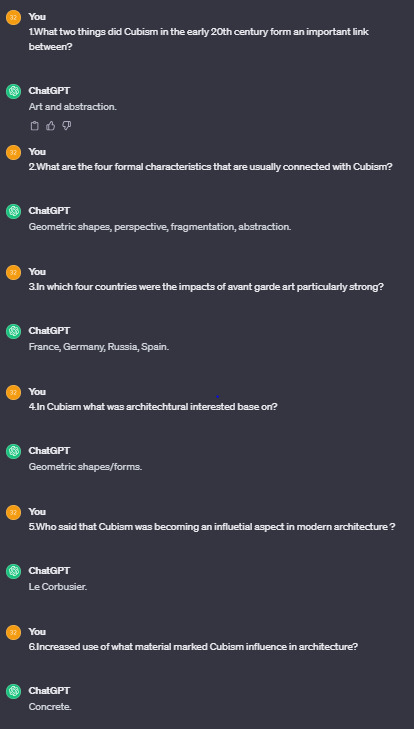

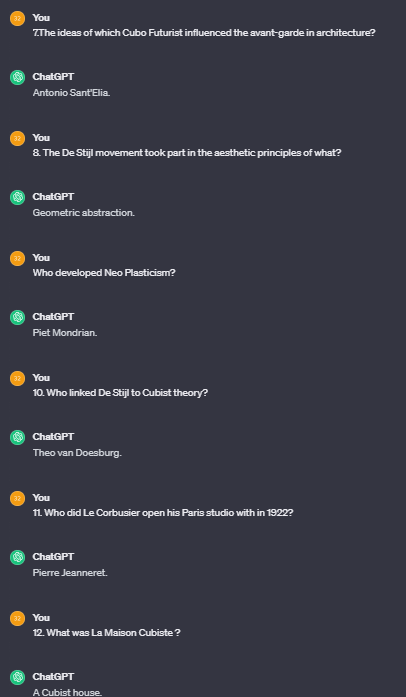

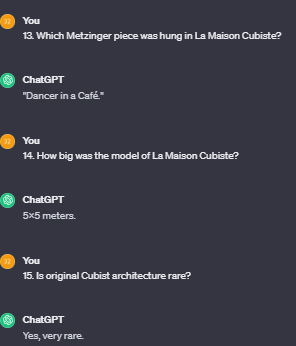

### 3) Like the requirements in 2), please design prompts to interact with Claude 2 and solve the question answering task on the data you prepared.

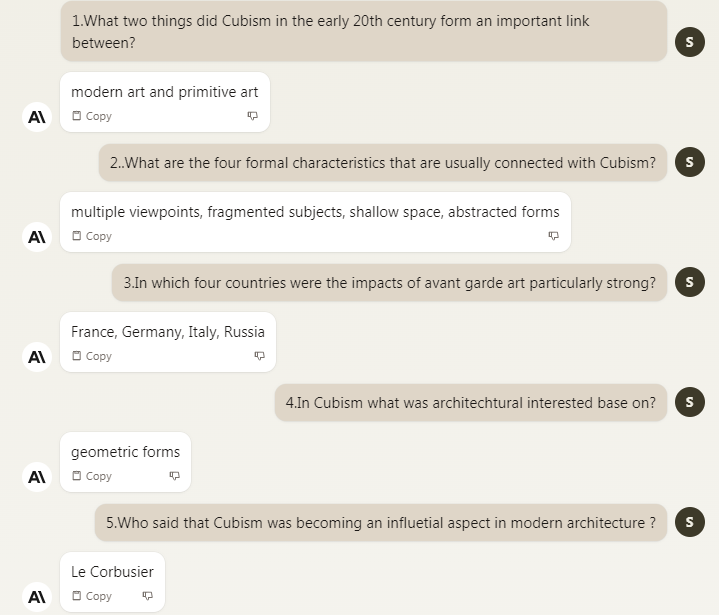

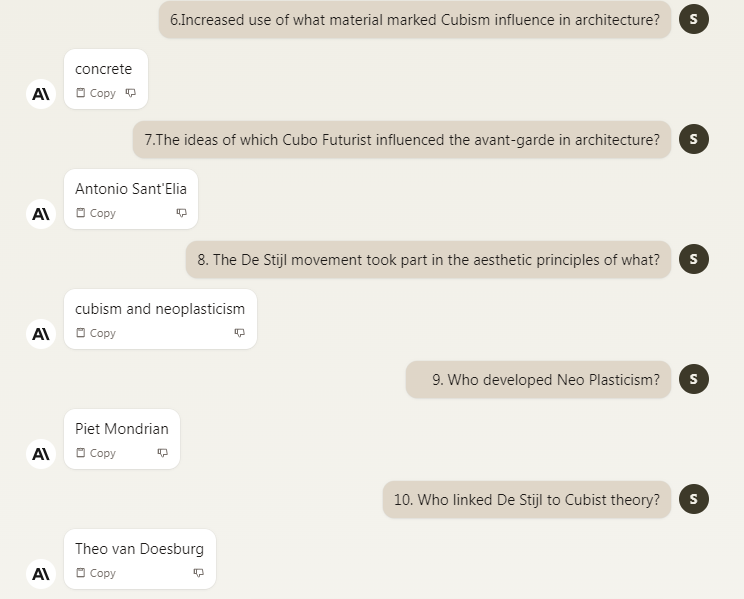

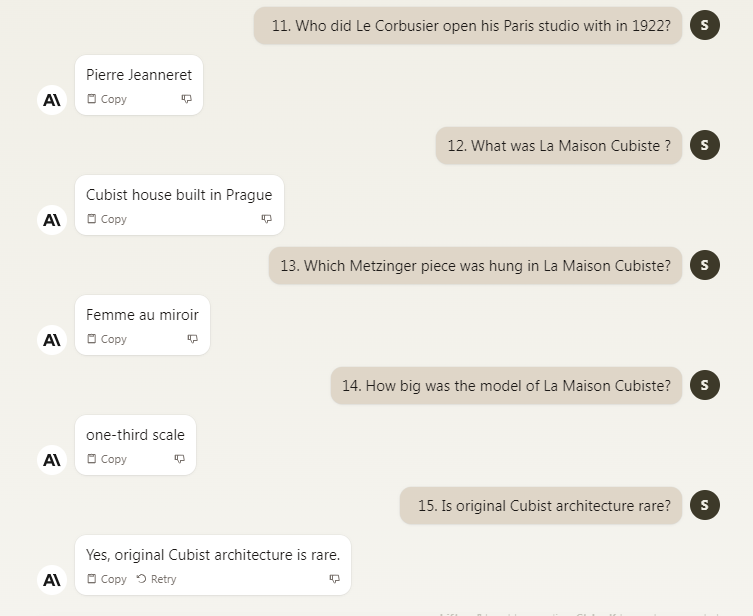

## 3. Results analysis and evaluation (30 points)

### (10 points) Please manually check if the output answer for each data sample is correct or not. You can also compare the output answers with the ground truth answer to each question.

Question: What two things did Cubism in the early 20th century form an important link between?
<br>RoBERT: Art and architecture - 1
<br>ChatGPT: Art and abstraction - 0.5
<br>Claude: Modern art and primitive art - 0.5

Question: What are the four formal characteristics that are usually connected with Cubism?
<br>RoBERT: Faceting of form, spatial ambiguity, transparency, and multiplicity -
<br>ChatGPT: Geometric shapes, perspective, fragmentation, abstraction - 0.5
<br>Claude: Multiple viewpoints, fragmented subjects, shallow space, abstracted forms - 0.5

Question: In which four countries were the impacts of avant-garde art particularly strong?
<br>RoBERT: France, Germany, the Netherlands, and Czechoslovakia - 1
<br>ChatGPT: France, Germany, Russia, Spain - 0.5
<br>Claude: France, Germany, Italy, Russia - 0.5

Question: In Cubism, what was architectural interest based on?
<br>RoBERT: The dissolution and reconstitution of three-dimensional form - 1
<br>ChatGPT: Geometric shapes/forms - 1
<br>Claude: Geometric forms - 1

Question: Who said that Cubism was becoming an influential aspect in modern architecture?
<br>RoBERT: Raymond Duchamp-Villon and André Mare - 1
<br>ChatGPT: Le Corbusier - 0
<br>Claude: Le Corbusier - 0

Question: What marked Cubism's influence in architecture with increased use?
<br>RoBERT: Glass - 1
<br>ChatGPT: Concrete - 0
<br>Claude: Concrete - 0

Question: The ideas of which Cubo Futurist influenced the avant-garde in architecture?
<br>RoBERT: Filippo Tommaso Marinetti - 1
<1br>ChatGPT: Antonio Sant'Elia - 0
<br>Claude: Antonio Sant'Elia - 0

Question: The De Stijl movement took part in the aesthetic principles of what?
<br>RoBERT: Neo-plasticism - 1
<br>ChatGPT: Geometric abstraction - 0
<br>Claude: Cubism and neoplasticism - 1

Question: Who developed Neo Plasticism?
<br>RoBERT: Piet Mondrian - 1
<br>ChatGPT: Piet Mondrian - 1
<br>Claude: Piet Mondrian - 1

Question: Who linked De Stijl to Cubist theory?
<br>RoBERT: Gino Severini - 1
<br>ChatGPT: Theo van Doesburg - 0
<br>Claude: Theo van Doesburg - 0

Question: Who did Le Corbusier open his Paris studio with in 1922?
<br>RoBERT: Jeanneret - 1
<br>ChatGPT: Pierre Jeanneret - 1
<br>Claude: Pierre Jeanneret - 1

Question: What was La Maison Cubiste?
<br>RoBERT: A fully furnished house - 1
<br>ChatGPT: A Cubist house - 1
<br>Claude: Cubist house built in Prague - 1

Question: Which Metzinger piece was hung in La Maison Cubiste?
<br>RoBERT: Femme au miroir - 1
<br>ChatGPT: "Dancer in a Café." - 0
<br>Claude: Femme au miroir - 1

Question: How big was the model of La Maison Cubiste?
<br>RoBERT: 10-by-3-meter - 1
<br>ChatGPT: 5x5 meters - 0
<br>Claude: One-third scale - 1

Question: Is original Cubist architecture rare?
<br>RoBERT: Very rare - 1
<br>ChatGPT: Yes, very rare - 1
<br>Claude: Yes, original Cubist architecture is rare. - 1

### 2) Provide comparison discussions and analysis based on the output and evaluation results you obtained from each model. For example, which model performs best, which performs worst, and what is the possible reason for such results. Based on 3 this question, what is your experience about the advantages and disadvantages of the pre-trained language models and the large language models?

RoBERT performed the best since he gave the most (all) accurate answers. When Claude and ChatGPT-3.5 faced off, Claude had the slight advantage. Despite the fact that ChatGPT was given guidelines to give thoughtful responses<br>

Advantages of pre-trained language models (like RoBERT and ChatGPT-3.5):

Wide knowledge base: They have access to vast amounts of information, making them knowledgeable on a wide range of topics.
<br>High accuracy: They can provide accurate information and answers for various questions.
<br>Prompt generation: They can generate responses quickly, enhancing user productivity.
<br>Versatility: They can be used for a wide range of tasks, from answering questions to content generation.<br><br>
Disadvantages of pre-trained language models:
<br><br>
Potential inaccuracies: They may occasionally provide incorrect or outdated information.
<br>Lack of context: They may not fully understand the context of a question, leading to incorrect responses.
<br>Ethical concerns: They can generate harmful or biased content if not used responsibly.
<br>Limited creativity: They may struggle to generate truly creative or innovative content.<br><br>
In this specific case, RoBERT outperformed the other models in providing accurate answers, followed by Claude and ChatGPT-3.5. This highlights the potential limitations of pre-trained models in terms of accuracy and context understanding. While they are powerful tools, users should be cautious and verify information, especially for critical applications.

### 3) (10 points) Select two specific data samples and compare the returned answers by the three models and compare the answers with the ground truth answers. Provide some discussions based on your findings on these two specific examples.

In [11]:
import random

# Generate two random indices within the dataset length
random_indices = random.sample(range(len(dataset)), 2)

# Select random pairs based on the generated indices
selected_pairs = [dataset['train'][i] for i in random_indices]


# Iterate through selected pairs and print them
for pair in selected_pairs:
    context = pair['context']
    question = pair['question']
    answer = pair['answers']

    print("Context:", context)
    print("Question:", question)
    print("Answer:", answer)
    print("=" * 30)  # Separator between pairs


Context: Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny's Child. Managed by her father, Mathew Knowles, the group became one of the world's best-selling girl groups of all time. Their hiatus saw the release of Beyoncé's debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".
Question: What areas did Beyonce compete in when she was growing up?
Answer: {'text': ['singing and dancing'], 'answer_start': [207]}
Context: Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born a

In the provided comparison of answers generated by three models (RoBERTa, ChatGPT, and Claude) for two specific questions, let's analyze the findings:

**Question 1: What areas did Beyonce compete in when she was growing up?**
- **Ground Truth Answer:** "singing and dancing"
- **RoBERTa's Answer:** "singing and dancing"
- **ChatGPT's Answer:** "Beyonce competed in singing and dancing competitions when she was growing up."
- **Claude's Answer:** "As a child Beyoncé performed in various singing and dancing competitions."

In this case, RoBERTa and ChatGPT provide concise and accurate answers that directly mention "singing and dancing," matching the ground truth. Claude's answer is also accurate but adds a bit more context.

**Question 2: When did Beyonce start becoming popular?**
- **Ground Truth Answer:** "in the late 1990s"
- **RoBERTa's Answer:** "late 1990s"
- **ChatGPT's Answer:** "Beyoncé started becoming popular in the late 1990s when she rose to fame as the lead singer of the R&B girl-group Destiny's Child."
- **Claude's Answer:** "Beyoncé rose to fame in the late 1990s as the lead singer of the R&B girl group Destiny's Child."

Here, all three models provide accurate answers that match the ground truth. RoBERTa and ChatGPT give a more concise answer by mentioning "late 1990s," while Claude's response includes additional context.

In both cases, it's important to note that RoBERTa and ChatGPT generate precise answers but may lack some context. Claude, on the other hand, provides more contextual information, which can be beneficial in certain scenarios.

Overall, the findings suggest that all three models are capable of generating accurate answers for these specific questions. The choice between them depends on whether you prefer concise answers or answers with additional context.

#### References:
Huggingface model documentation, ChatGPT, Github
